# Sign Language Recogntion

In [1]:
# import all required libraries for reading, analysing and visualizing data
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import os
import cv2
from tqdm import tqdm
import random

## Load the dataset

In [2]:
labels = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8',
    9: '9', 10: 'a', 11: 'b', 12: 'c', 13: 'd', 14: 'e', 15: 'f', 16: 'g',
    17: 'h', 18: 'i', 19: 'j', 20: 'k', 21: 'l', 22: 'm', 23: 'n', 24: 'o',
    25: 'p', 26: 'q', 27: 'r', 28: 's', 29: 't', 30: 'u', 31: 'v', 32: 'w',
    33: 'x', 34: 'y', 35: 'z'
}

IMG_SIZE = 100

In [3]:
def loadData(DIR):
    X = []
    Y = []
    for i in range(36):
        path = os.path.join(DIR, str(labels[i]))
        for img in tqdm(os.listdir(path)):
            arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
            resized_arr = cv2.resize(arr, (IMG_SIZE, IMG_SIZE))
            X.append(resized_arr)
            Y.append(i)
    return (np.array(X), np.array(Y))

In [5]:
DIR = '../Large Datasets/asl/'
(X, Y) = loadData(DIR)

100%|███████████████████████████████████████████████████████████████████████████████| 700/700 [00:04<00:00, 146.92it/s]


## Data Visualiztion

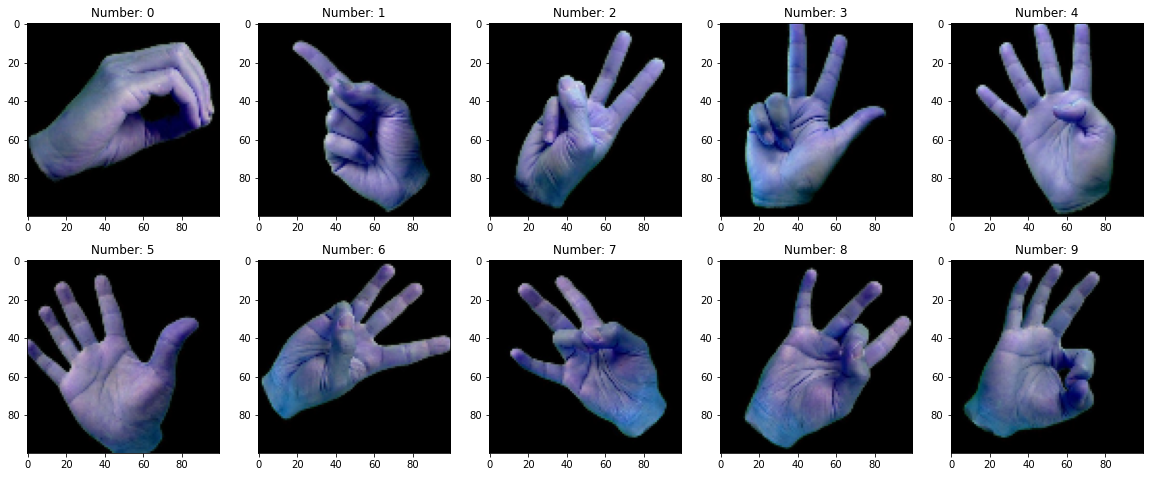

In [6]:
# 1 image of each of the numbers
fig, ax = plt.subplots(2, 5)
fig.set_size_inches(20, 8)
l = 0
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(X[l])
        ax[i, j].set_title('Number: ' + labels[Y[l]])
        if i == 0:
            l = l + 842
        else:
            l = l + 701

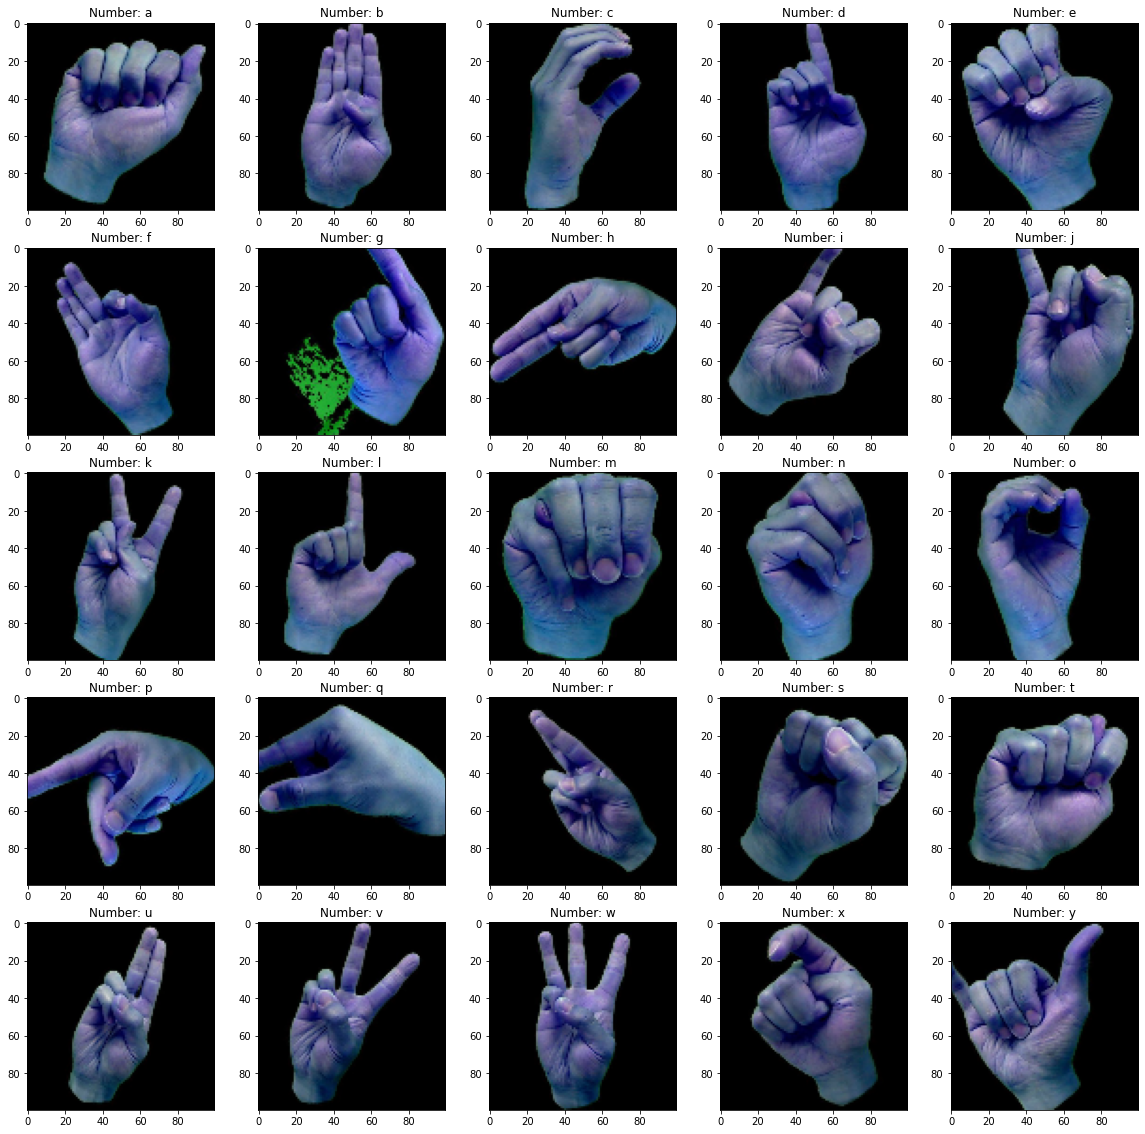

In [7]:
# 1 image of each of the characters
fig, ax = plt.subplots(5, 5)
fig.set_size_inches(20, 20)
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(X[l])
        ax[i, j].set_title('Character: ' + labels[Y[l]])
        l = l + 701

## Preprocessing of data

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [9]:
# normalize the data
X = X / 255

# reshape the data
Y = Y.reshape(-1, 1)
Y = keras.utils.to_categorical(Y, 36)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# Explore the dataset
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_test shape:" + str(X_test.shape))
print("Y_test shape:" + str(Y_test.shape))

X_train shape:(18968, 100, 100, 3)
Y_train shape:(18968, 36)
X_test shape:(6323, 100, 100, 3)
Y_test shape:(6323, 36)


## CNN Model

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten
from keras.layers import Dense

In [14]:
model = Sequential(
    [
        Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = (IMG_SIZE, IMG_SIZE, 3)),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        
        Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        
        Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        
        Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        
        Conv2D(filters = 512, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        
        Flatten(),
        Dense(1024, activation = 'relu'),
        Dropout(0.5),
        Dense(36, activation = 'softmax')
    ]
)

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 256)      

In [16]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
history = model.fit(X_train, Y_train, epochs = 8, validation_split = 0.2)

Epoch 1/8
475/475 [==============================] - 527s 1s/step - loss: 1.4703 - accuracy: 0.5418 - val_loss: 0.3262 - val_accuracy: 0.8809
Epoch 2/8
475/475 [==============================] - 508s 1s/step - loss: 0.2974 - accuracy: 0.8864 - val_loss: 0.2010 - val_accuracy: 0.9222
Epoch 3/8
475/475 [==============================] - 516s 1s/step - loss: 0.1893 - accuracy: 0.9261 - val_loss: 0.1246 - val_accuracy: 0.9526
Epoch 4/8
475/475 [==============================] - 515s 1s/step - loss: 0.1453 - accuracy: 0.9423 - val_loss: 0.1348 - val_accuracy: 0.9502
Epoch 5/8
475/475 [==============================] - 521s 1s/step - loss: 0.1162 - accuracy: 0.9556 - val_loss: 0.0792 - val_accuracy: 0.9707
Epoch 6/8
475/475 [==============================] - 480s 1s/step - loss: 0.0947 - accuracy: 0.9645 - val_loss: 0.0750 - val_accuracy: 0.9758
Epoch 7/8
475/475 [==============================] - 428s 901ms/step - loss: 0.0794 - accuracy: 0.9709 - val_loss: 0.0645 - val_accuracy: 0.9755
Epo

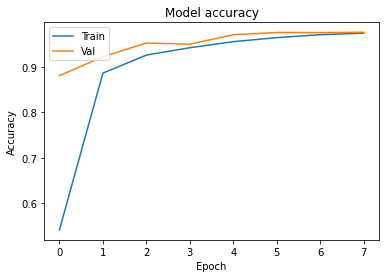

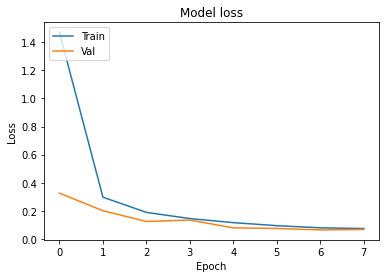

In [18]:
# plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

# plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

In [19]:
# find the accuracy on train and test set
train_loss, train_acc = model.evaluate(X_train, Y_train)
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Accuracy on train set is %f" %(train_acc * 100)  + "%")
print("Accuracy on test set is %f" %(test_acc * 100)  + "%")

198/198 [==============================] - 26s 132ms/step - loss: 0.0715 - accuracy: 0.9733
Accuracy on train set is 98.492199%
Accuracy on test set is 97.327220%


## Saving our model

In [20]:
# Save our model locally
keras_file = "sign_lang.h5"
model.save(keras_file)